In [1]:
import os
import nibabel as nib
import numpy as np

def file_to_ndarray(filepath):
    # Check the file extension
    _, file_extension = os.path.splitext(filepath)
    #print(file_extension)
    
    try:
        if file_extension in ['.nii', '.nii.gz', '.gz']:  # Handle gzipped or regular NIfTI files
            # Load the NIfTI file
            nii_img = nib.load(filepath)
            # Convert to ndarray
            data = nii_img.get_fdata()
            #print(f"Loaded NIfTI file: {filepath}")
        else:
            print("Unsupported file format.")
            return None
        
        return data
    
    except Exception as e:
        print(f"An error occurred while processing the file: {e}")
        return None

In [2]:
filepath = r'C:\Users\acer\Desktop\Project_TMJOA\Data\47-4881 L 2014.nii.gz'

voxel = file_to_ndarray(filepath)
print(voxel.shape)

(224, 224, 224)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def display_array_slice(array3d, axis=0, slice_num=0):
    """
    Display a 2D slice from a 3D numpy array.
    
    Parameters:
    -----------
    array3d : numpy.ndarray
        Input 3D array
    axis : int
        Axis along which to take the slice (0, 1, or 2)
    slice_num : int
        Index of the slice to display
        
    Returns:
    --------
    None (displays the plot)
    """
    # Input validation
    if not isinstance(array3d, np.ndarray) or array3d.ndim != 3:
        raise ValueError("Input must be a 3D numpy array")
    
    if axis not in [0, 1, 2]:
        raise ValueError("Axis must be 0, 1, or 2")
    
    # Get the maximum valid slice number for the chosen axis
    max_slice = array3d.shape[axis] - 1
    if slice_num > max_slice:
        raise ValueError(f"Slice number must be between 0 and {max_slice} for axis {axis}")
    
    # Extract the slice based on the axis
    if axis == 0:
        slice_2d = array3d[slice_num, :, :]
        title = f"Slice {slice_num} along axis 0 (front to back)"
    elif axis == 1:
        slice_2d = array3d[:, slice_num, :]
        title = f"Slice {slice_num} along axis 1 (top to bottom)"
    else:  # axis == 2
        slice_2d = array3d[:, :, slice_num]
        title = f"Slice {slice_num} along axis 2 (left to right)"
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.imshow(slice_2d, cmap='viridis')
    plt.colorbar(label='Value')
    plt.title(title)
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

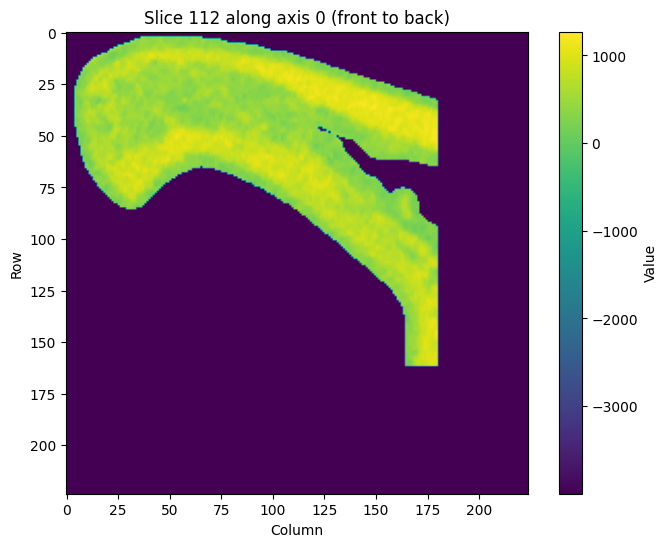

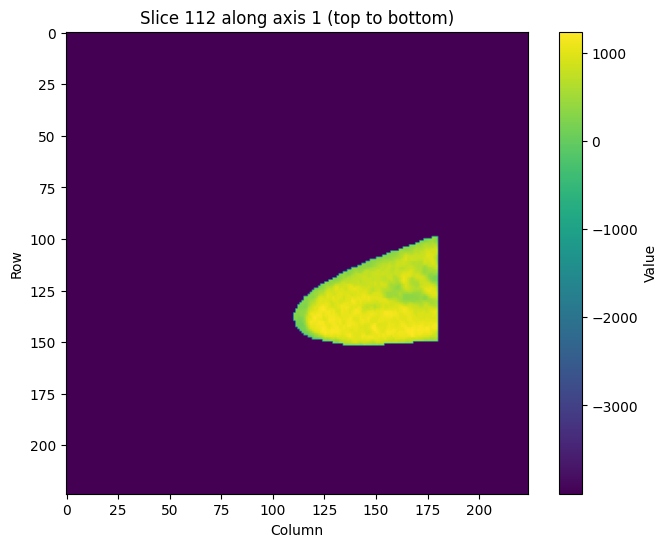

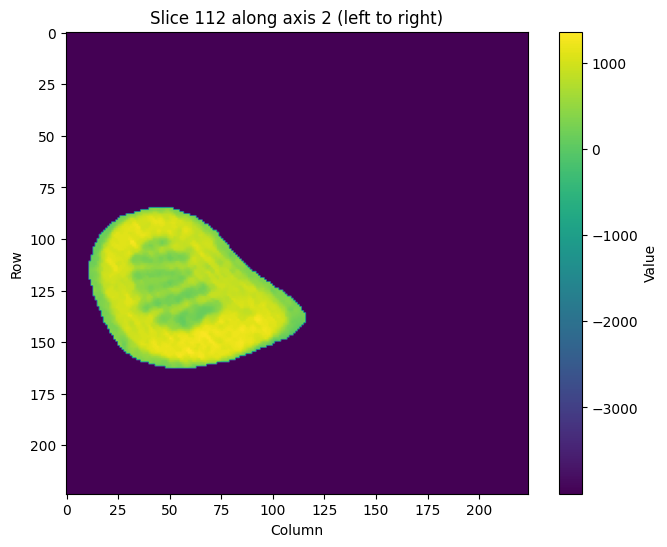

In [4]:
# Display different slices
display_array_slice(voxel, axis=0, slice_num=112)  # Show third slice along axis 0
display_array_slice(voxel, axis=1, slice_num=112)  # Show fourth slice along axis 1
display_array_slice(voxel, axis=2, slice_num=112)  # Show fifth slice along axis 2

In [5]:
def compute_histogram(ndarray):
    
    flat_array = ndarray.flatten()

    # Define the bin edges from -4000 to 4000 with a bin size of 10
    bins = np.arange(-4000, 4001, 10)  # 2001 to include the endpoint 2000 in the last bin

    # Compute histogram
    histogram_values, bin_edges = np.histogram(flat_array, bins=bins)

    # Convert histogram values to list
    #histogram_list = histogram_values.tolist()

    return histogram_values, bin_edges


In [6]:
histogram_list, bin_edges = compute_histogram(voxel)
print(histogram_list[1:])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import norm

def plot_histogram_peaks_normal(arr, bin_edges, variance1=1.0, variance2=1.0, height=None, distance=1, prominence=None):
    """
    Plot histogram with local peaks and normal distributions centered at the two highest peaks
    
    Parameters:
    -----------
    arr : numpy.ndarray
        1D input array of histogram heights
    bin_edges : numpy.ndarray
        Array of bin edges (should be len(arr) + 1)
    variance1 : float
        Variance for the normal distribution at the highest peak
    variance2 : float
        Variance for the normal distribution at the second highest peak
    height : float or None
        Minimum height of peaks
    distance : int
        Minimum horizontal distance between peaks
    prominence : float or None
        Minimum prominence of peaks
    """
    if len(bin_edges) != len(arr) + 1:
        raise ValueError("bin_edges should have length equal to arr length + 1")
        
    # Find local peaks
    peaks, properties = find_peaks(arr, height=height, distance=distance, prominence=prominence)
    peak_heights = arr[peaks]
    
    # Sort peaks by height
    peak_order = np.argsort(peak_heights)[::-1]
    peaks_sorted = peaks[peak_order]
    heights_sorted = peak_heights[peak_order]
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot histogram bars
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.bar(bin_centers, arr, width=bin_edges[1]-bin_edges[0], 
            alpha=0.5, color='blue', label='Histogram')
    
    # Plot peaks
    peak_x_positions = bin_centers[peaks_sorted]
    plt.scatter(peak_x_positions, heights_sorted, 
                c='red', s=100, label='Local Peaks')
    
    # Add normal distributions for top two peaks
    colors = ['g', 'm']  # green for first peak, magenta for second
    styles = ['--', ':']  # dashed for first peak, dotted for second
    variances = [variance1, variance2]
    
    for i in range(min(2, len(peaks_sorted))):
        peak_center = bin_centers[peaks_sorted[i]]
        peak_height = heights_sorted[i]
        variance = variances[i]
        
        # Create x range centered around the peak
        x_normal = np.linspace(peak_center - 4*np.sqrt(variance), 
                             peak_center + 4*np.sqrt(variance), 
                             200)
        
        # Calculate normal distribution
        y_normal = norm.pdf(x_normal, peak_center, np.sqrt(variance))
        
        # Scale the normal distribution to match peak height
        y_normal = y_normal * (peak_height / np.max(y_normal))
        
        # Plot normal distribution
        plt.plot(x_normal, y_normal, 
                color=colors[i], 
                linestyle=styles[i],
                label=f'Normal at Peak {i+1} (σ²={variance:.1f})', 
                linewidth=2)
        
        # Add peak labels
        plt.annotate(f'Peak {i+1}', 
                    (peak_center, peak_height),
                    xytext=(5, 5),
                    textcoords='offset points')
    
    plt.grid(True, alpha=0.3)
    plt.xlabel('Bin Center')
    plt.ylabel('Count')
    plt.title('Histogram with Local Peaks and Normal Distributions')
    plt.legend()
    plt.show()
    
    return peaks_sorted, heights_sorted, peak_x_positions


In [8]:
histogram_val, bin_edges = compute_histogram(voxel)

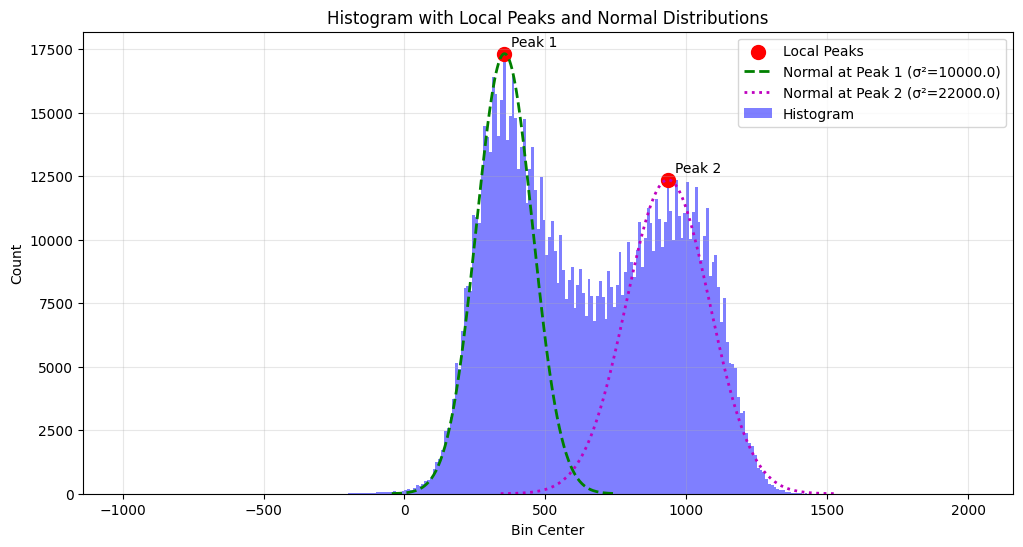

Peak bin centers: [355. 935.]
Peak heights: [17321 12358]


In [9]:
input_y = histogram_val[1:]
input_x = bin_edges[1:]

# Plot with different variances for each peak
peaks, heights, peak_centers = plot_histogram_peaks_normal(
    input_y[300:600],
    input_x[300:601],
    variance1=10000,    # Variance for highest peak
    variance2=22000,    # Variance for second peak
    height=0,      # No minimum height
    distance=20,       # Minimum 5 bins between peaks
    prominence=2000     # Minimum prominence
)

print("Peak bin centers:", peak_centers)
print("Peak heights:", heights)

In [10]:
import numpy as np
from scipy.stats import norm

def rescale_by_probability(image, target_mean, variance):
    """
    Rescale pixel values based on their probability of being the pixel of interest
    under a normal distribution.
    
    Parameters:
    -----------
    image : numpy.ndarray
        Input grayscale image array
    target_mean : float
        The target pixel value (mean of the normal distribution)
    variance : float
        Variance of the normal distribution
    
    Returns:
    --------
    numpy.ndarray
        Rescaled image where each pixel value represents the probability
        of that pixel being the pixel of interest
    """
    # Create a copy to avoid modifying the original
    rescaled = image.copy().astype(float)
    
    # Calculate probability for each pixel value
    probabilities = norm.pdf(rescaled, target_mean, np.sqrt(variance))
    
    # Normalize to [0, 1] range
    probabilities = (probabilities - probabilities.min()) / (probabilities.max() - probabilities.min())
    
    # Optional: Convert to uint8 for visualization (0-255)
    rescaled = (probabilities * 255).astype(np.uint8)
    
    return rescaled

def visualize_rescaling(original, rescaled, target_mean, variance):
    """
    Visualize original and rescaled images side by side
    """
    import matplotlib.pyplot as plt
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original image
    im1 = ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Image')
    plt.colorbar(im1, ax=ax1)
    
    # Rescaled image
    im2 = ax2.imshow(rescaled, cmap='gray')
    ax2.set_title(f'Probability Map\n(mean={target_mean}, variance={variance})')
    plt.colorbar(im2, ax=ax2)
    
    plt.tight_layout()
    plt.show()

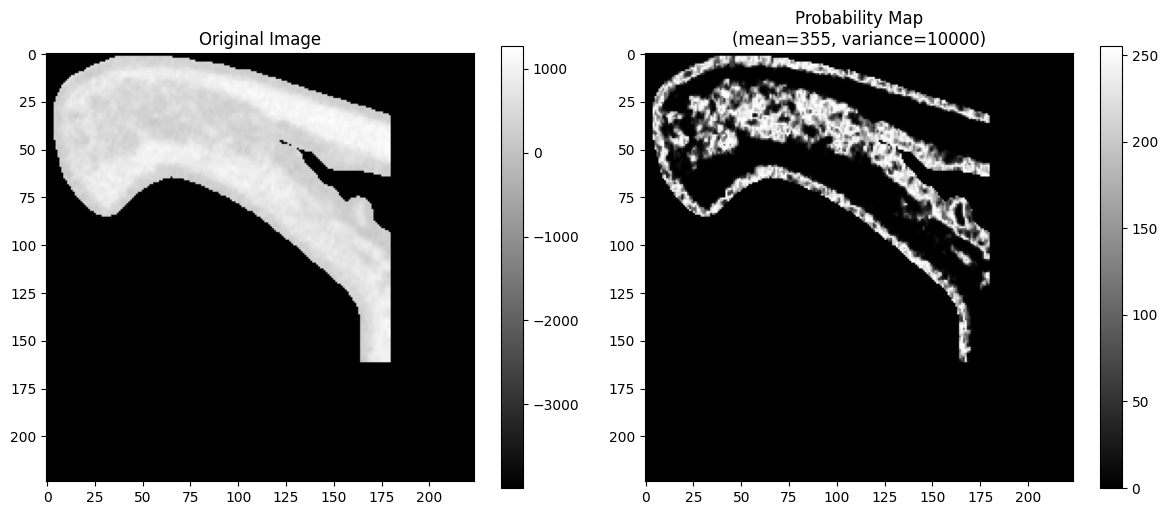

In [15]:
slice_2d = voxel[112, :, :]

# Target pixel value of 100 with some variance
target_mean = 355
variance = 10000  # Wide variance to show the effect

# Rescale the image
rescaled_image_air = rescale_by_probability(slice_2d, target_mean, variance)

# Visualize results
visualize_rescaling(slice_2d, rescaled_image_air, target_mean, variance)

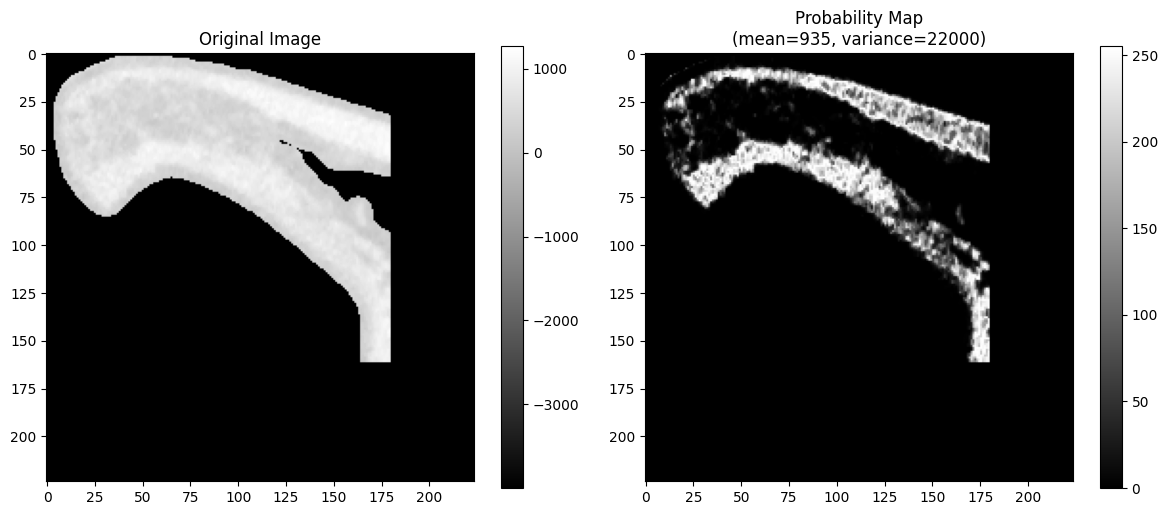

In [16]:
slice_2d = voxel[112, :, :]

# Target pixel value of 100 with some variance
target_mean = 935
variance = 22000  # Wide variance to show the effect

# Rescale the image
rescaled_image_bone = rescale_by_probability(slice_2d, target_mean, variance)

# Visualize results
visualize_rescaling(slice_2d, rescaled_image_bone, target_mean, variance)

In [22]:
import numpy as np

def rescale_range(array, a, b):
    """
    Rescale values in range [a,b] to [0,255] based on their position in the range.
    Values outside [a,b] become 0.
    
    Parameters:
    array: np.ndarray - Input array
    a: float - Lower bound of the range
    b: float - Upper bound of the range
    """
    # Create a copy to avoid modifying the original
    result = array.copy()
    
    # Set values outside [a,b] to 0
    result[result < a] = 0
    result[result > b] = 0
    
    # Find values within the range
    mask = (result >= a) & (result <= b)
    
    # Linear rescaling of values in range [a,b] to [0,255]
    result[mask] = ((result[mask] - a) / (b - a)) * 255
    
    return result

# Example usage:
# array = your_array
# rescaled = rescale_range(array, 100, 200)

In [49]:
slice_2d = voxel[112, :, :]
a = 355
b = 935
adjust_const = 0.25
adjust = int((b-a)*adjust_const)
print(b-a, adjust)

area_of_uncertainty = rescale_range(slice_2d, a+adjust, b-adjust)

580 145


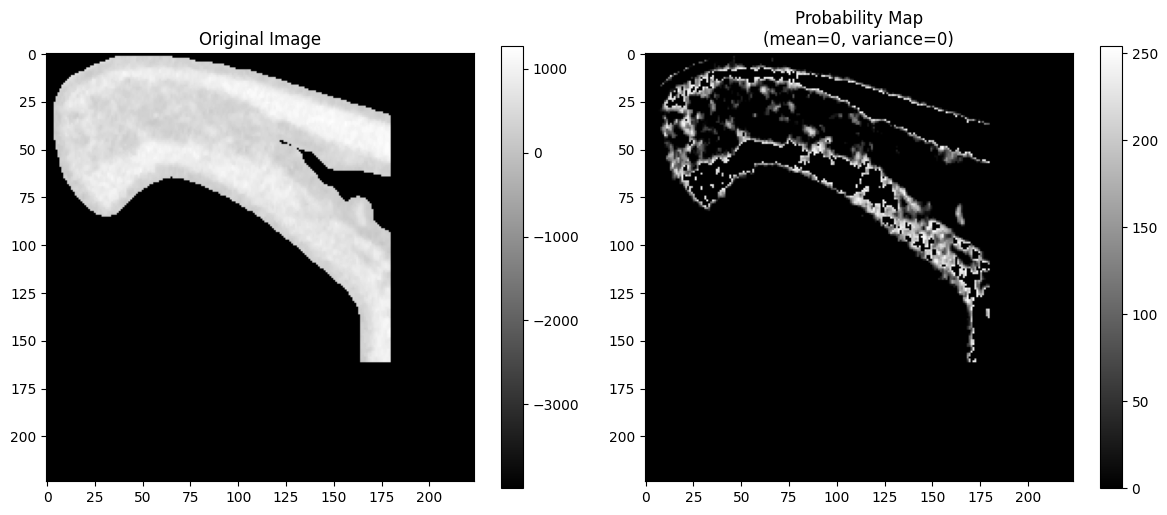

In [50]:
visualize_rescaling(slice_2d, area_of_uncertainty, 0, 0)

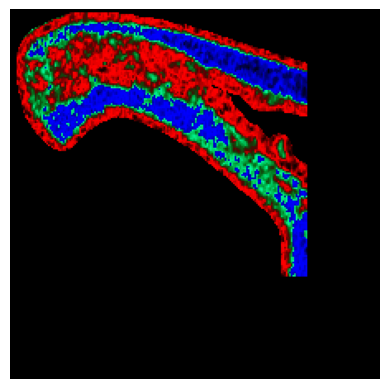

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have three 2D arrays of the same shape
# Convert them to uint8 if they aren't already
red = rescaled_image_air.astype(np.uint8)
green = area_of_uncertainty.astype(np.uint8)
blue = rescaled_image_bone.astype(np.uint8)

# Combine into RGB
rgb_image = np.stack([red, green, blue], axis=2)

# Display the image
plt.imshow(rgb_image)
plt.axis('off')
plt.show()